In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from keras import models, layers, optimizers

In [5]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

W0707 13:35:28.927921  6720 deprecation_wrapper.py:119] From C:\Users\1_pha\AppData\Local\Continuum\anaconda3\envs\pathenv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 13:35:28.929916  6720 deprecation_wrapper.py:119] From C:\Users\1_pha\AppData\Local\Continuum\anaconda3\envs\pathenv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [7]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='mse',
             metrics=['accuracy'])

W0707 13:36:20.064783  6720 deprecation_wrapper.py:119] From C:\Users\1_pha\AppData\Local\Continuum\anaconda3\envs\pathenv\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [8]:
from keras.datasets import imdb

In [10]:
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [11]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 2s 1us/step


In [12]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
# output = relu(dot(W, input) + b)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

W0707 14:03:17.507136  6720 deprecation_wrapper.py:119] From C:\Users\1_pha\AppData\Local\Continuum\anaconda3\envs\pathenv\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0707 14:03:17.511168  6720 deprecation.py:323] From C:\Users\1_pha\AppData\Local\Continuum\anaconda3\envs\pathenv\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
y_val[0]

1.0

In [21]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train,
                   epochs=20, batch_size=512, validation_data=(x_val, y_val))

W0707 14:33:34.336283  6720 deprecation_wrapper.py:119] From C:\Users\1_pha\AppData\Local\Continuum\anaconda3\envs\pathenv\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.4976 - acc: 0.7951 - val_loss: 0.3716 - val_acc: 0.8726
Epoch 2/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.2958 - acc: 0.9045 - val_loss: 0.2989 - val_acc: 0.8907
Epoch 3/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.2160 - acc: 0.9287 - val_loss: 0.3086 - val_acc: 0.8713
Epoch 4/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1742 - acc: 0.9432 - val_loss: 0.2830 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1415 - acc: 0.9543 - val_loss: 0.2863 - val_acc: 0.8853
Epoch 6/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1143 - acc: 0.9654 - val_loss: 0.3088 - val_acc: 0.8811
Epoch 7/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.0970 - acc: 0.9709 - val_loss: 0.3146 - 

Text(0.5, 1.0, 'Training and Validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

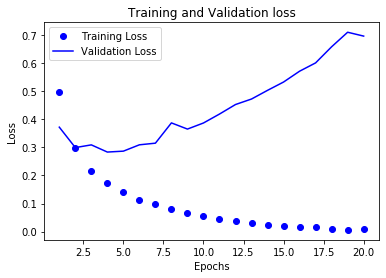

In [23]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

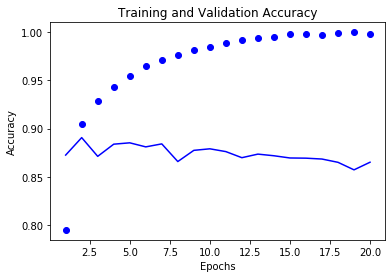

In [25]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()